In [34]:
import pandas as pd
import numpy as np

In [85]:
corpus = ['data science professionals have promising career path']
print(corpus)

['data science professionals have promising career path']


In [86]:
words = corpus[0].split(" ")
print(words)

['data', 'science', 'professionals', 'have', 'promising', 'career', 'path']


In [87]:
#4 Generate word number : optional
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

print(word2int)

{'data': 0, 'science': 1, 'professionals': 2, 'have': 3, 'promising': 4, 'career': 5, 'path': 6}


In [89]:
WINDOW_SIZE_NUM = 2

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

for WINDOW_SIZE in np.arange (1,WINDOW_SIZE_NUM+1):
    skipgram = []
    for sentence in sentences:
        for idx, word in enumerate(sentence):
            for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
                if neighbor != word:
                    skipgram.append([word, neighbor])

    print('Window Size = ', WINDOW_SIZE)
    print('Number of Entries = ',len(skipgram))

    skipgramDF = pd.DataFrame(skipgram, columns = ['input','label'])
    print(skipgramDF)
    print('----------------------------------------')

Window Size =  1
Number of Entries =  12
            input          label
0            data        science
1         science           data
2         science  professionals
3   professionals        science
4   professionals           have
5            have  professionals
6            have      promising
7       promising           have
8       promising         career
9          career      promising
10         career           path
11           path         career
----------------------------------------
Window Size =  2
Number of Entries =  22
            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals           data
6   professionals        science
7   professionals           have
8   professionals      promising
9            have        science
10           have  professionals
11           have      promising
12           have  

In [90]:
skipNgram_df = pd.DataFrame(skipgram, columns = ['input','label'])
print(skipNgram_df)

            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals           data
6   professionals        science
7   professionals           have
8   professionals      promising
9            have        science
10           have  professionals
11           have      promising
12           have         career
13      promising  professionals
14      promising           have
15      promising         career
16      promising           path
17         career           have
18         career      promising
19         career           path
20           path      promising
21           path         career


In [91]:
input_1 = pd.get_dummies(skipNgram_df.input)
print(input_1)

    career  data  have  path  professionals  promising  science
0        0     1     0     0              0          0        0
1        0     1     0     0              0          0        0
2        0     0     0     0              0          0        1
3        0     0     0     0              0          0        1
4        0     0     0     0              0          0        1
5        0     0     0     0              1          0        0
6        0     0     0     0              1          0        0
7        0     0     0     0              1          0        0
8        0     0     0     0              1          0        0
9        0     0     1     0              0          0        0
10       0     0     1     0              0          0        0
11       0     0     1     0              0          0        0
12       0     0     1     0              0          0        0
13       0     0     0     0              0          1        0
14       0     0     0     0            

In [92]:
label_1 = pd.get_dummies(skipNgram_df.label)
print(label_1)

    career  data  have  path  professionals  promising  science
0        0     0     0     0              0          0        1
1        0     0     0     0              1          0        0
2        0     1     0     0              0          0        0
3        0     0     0     0              1          0        0
4        0     0     1     0              0          0        0
5        0     1     0     0              0          0        0
6        0     0     0     0              0          0        1
7        0     0     1     0              0          0        0
8        0     0     0     0              0          1        0
9        0     0     0     0              0          0        1
10       0     0     0     0              1          0        0
11       0     0     0     0              0          1        0
12       1     0     0     0              0          0        0
13       0     0     0     0              1          0        0
14       0     0     1     0            

In [93]:
corpus = ['I like deep learning','I like NLP','I enjoy flying']

In [94]:
def remove_stop_words(corpus):
    stop_words=['is','a','an','will','be','become','many','in','like','and']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

In [95]:
corpus = remove_stop_words(corpus)
print(corpus)

['I deep learning', 'I NLP', 'I enjoy flying']


In [96]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = sorted(set(words))
print(words)

['I', 'NLP', 'deep', 'enjoy', 'flying', 'learning']


In [97]:
WINDOW_SIZE_NUM = 2

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

for WINDOW_SIZE in np.arange (1,WINDOW_SIZE_NUM+1):
    skipgram = []
    for sentence in sentences:
        for idx, word in enumerate(sentence):
            for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
                if neighbor != word:
                    skipgram.append([word, neighbor])

    print('Window Size = ', WINDOW_SIZE)
    print('Number of Entries = ',len(skipgram))

    skipgramDF = pd.DataFrame(skipgram, columns = ['input','label'])
    print(skipgramDF)
    print('----------------------------------------')

Window Size =  1
Number of Entries =  10
      input     label
0         I      deep
1      deep         I
2      deep  learning
3  learning      deep
4         I       NLP
5       NLP         I
6         I     enjoy
7     enjoy         I
8     enjoy    flying
9    flying     enjoy
----------------------------------------
Window Size =  2
Number of Entries =  14
       input     label
0          I      deep
1          I  learning
2       deep         I
3       deep  learning
4   learning         I
5   learning      deep
6          I       NLP
7        NLP         I
8          I     enjoy
9          I    flying
10     enjoy         I
11     enjoy    flying
12    flying         I
13    flying     enjoy
----------------------------------------


In [98]:
skipNgram_df = pd.DataFrame(skipgram, columns = ['input','label'])
print(skipNgram_df)

       input     label
0          I      deep
1          I  learning
2       deep         I
3       deep  learning
4   learning         I
5   learning      deep
6          I       NLP
7        NLP         I
8          I     enjoy
9          I    flying
10     enjoy         I
11     enjoy    flying
12    flying         I
13    flying     enjoy


In [100]:
input_2 = pd.get_dummies(skipNgram_df.input)
print(input_2)

    I  NLP  deep  enjoy  flying  learning
0   1    0     0      0       0         0
1   1    0     0      0       0         0
2   0    0     1      0       0         0
3   0    0     1      0       0         0
4   0    0     0      0       0         1
5   0    0     0      0       0         1
6   1    0     0      0       0         0
7   0    1     0      0       0         0
8   1    0     0      0       0         0
9   1    0     0      0       0         0
10  0    0     0      1       0         0
11  0    0     0      1       0         0
12  0    0     0      0       1         0
13  0    0     0      0       1         0


In [101]:
label_2 = pd.get_dummies(skipNgram_df.label)
print(label_2)

    I  NLP  deep  enjoy  flying  learning
0   0    0     1      0       0         0
1   0    0     0      0       0         1
2   1    0     0      0       0         0
3   0    0     0      0       0         1
4   1    0     0      0       0         0
5   0    0     1      0       0         0
6   0    1     0      0       0         0
7   1    0     0      0       0         0
8   0    0     0      1       0         0
9   0    0     0      0       1         0
10  1    0     0      0       0         0
11  0    0     0      0       1         0
12  1    0     0      0       0         0
13  0    0     0      1       0         0


In [102]:
input_2.shape

(14, 6)

In [103]:
label_2.shape

(14, 6)

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [104]:
model = Sequential()
model.add(Dense(2, input_dim = input_2.shape[1], activation='linear'))
model.add(Dense(label_2.shape[1], activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 14        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 18        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [105]:
epochs = 20000
hist = model.fit(input_2, label_2, verbose = 0, epochs = epochs)

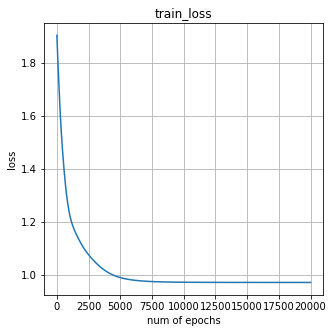

In [106]:
import matplotlib.pyplot as plt
train_loss = hist.history['loss']
xc = range(epochs)
plt.plot(xc, train_loss)

plt.figure(1, figsize=(7,5))
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)

In [107]:
for layerNum, layer in enumerate(model.layers):
    print('Layer number=', layerNum)
    print('weights values=')
    weights = layer.get_weights()[0]
    print(weights)
    
    print('bias values=')
    biases = layer.get_weights()[1]
    break
    print(biases)
    print('================')

Layer number= 0
weights values=
[[  4.471248    5.323792 ]
 [ -1.5692935  -1.4519668]
 [  2.0528016  -1.433134 ]
 [  5.281228   -8.062488 ]
 [-10.085553    1.8141742]
 [ -1.4540555   0.9130303]]
bias values=


In [108]:
Word2Vec = weights + biases
print(Word2Vec)

[[  2.7584014    3.9235904 ]
 [ -3.2821403   -2.8521683 ]
 [  0.33995497  -2.8333354 ]
 [  3.5683813   -9.462689  ]
 [-11.7984       0.41397262]
 [ -3.166902    -0.48717123]]


In [109]:
w2v_df = pd.DataFrame(Word2Vec, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word','x1','x2']]
w2v_df

,word,x1,x2
0,I,2.758401,3.923590
1,NLP,-3.282140,-2.852168
2,deep,0.339955,-2.833335
3,enjoy,3.568381,-9.462689
4,flying,-11.798400,0.413973
5,learning,-3.166902,-0.487171


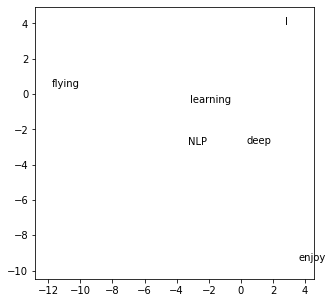

In [110]:
fig, ax = plt.subplots()

for word,x1,x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2))
    
PADDING = 1.0
x_axis_min = np.amin(Word2Vec, axis=0)[0] - PADDING
y_axis_min = np.amin(Word2Vec, axis=0)[1] - PADDING
x_axis_max = np.amax(Word2Vec, axis=0)[0] + PADDING
y_axis_max = np.amax(Word2Vec, axis=0)[1] + PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams['figure.figsize'] = (5,5)

plt.show()